In [2]:
# Prelude for cell hackiness

import codecs
import IPython.display
from struct import pack, unpack
from IPython.display import display, Math, Latex

def initializeHack():
    html = """
    <style>
    .reveal .output_stderr {
        display: none !important;
    }
    .reveal .prompt {
        color: #FFFFFF !important;
    }
    </style>
    """
    IPython.display.display_html(html, raw=True)

def hide_code_in_slideshow():
    initializeHack()
    import os
    uid = str(codecs.encode(os.urandom(8), "hex"), 'ascii')
    html = """
    <div id="%s">
        <small style="font-size: 8px;">[Double Click for Code]</small>
        <style>
        .hide-in-slideshow-%s {
            display: None ! important;
        }
        </style>
    </div>
    <script type="text/javascript">
        var show_%s = function() {
            var p = $("#%s");
            var orig = p;
            if (p.length==0) return;

            while (!p.hasClass("cell")) {
                p=p.parent();

                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.dblclick(function() {
              if (!orig.hasClass("hide-in-slideshow-%s")) {
                cell.find(".input").removeClass("hide-in-slideshow-%s");
                orig.addClass("hide-in-slideshow-%s");
              } else {
                cell.find(".input").addClass("hide-in-slideshow-%s");
                orig.removeClass("hide-in-slideshow-%s");
              }
            });
            cell.find(".input").addClass("hide-in-slideshow-%s");
        }
        show_%s();
    </script>""" % (uid, uid, uid, uid, uid, uid, uid, uid, uid, uid, uid)
    IPython.display.display_html(html, raw=True)

hide_code_in_slideshow()

[Double Click for Code]

# Reinventing Fast Inverse Roots Using  $8^{th}$ Grade Math.

*Algebra, Straight Lines, and Logarithms Oh My!*

By: [Lee](https://github.com/leegao) 

[Notebook View](https://nbviewer.jupyter.org/github/leegao/BullshitMath.lol/blob/master/FastRoot.ipynb)

<small><em>Press the Right key to navigate these slides.</em></small>

In [5]:
setup_html = r'''
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/github-fork-ribbon-css/0.2.0/gh-fork-ribbon.min.css" />
<!--[if lt IE 9]>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/github-fork-ribbon-css/0.2.0/gh-fork-ribbon.ie.min.css" />
<![endif]-->
<style>
  .github-fork-ribbon::after {line-height: initial !important;padding: initial !important;}
  .github-fork-ribbon {font-size: 14px;}
  .navigate-up, .navigate-down {
      display: none !important;
  }
</style>
<script>
$(document).ready(function() {
    $("body").append('<a class="github-fork-ribbon" href="http://www.bullshitmath.lol" title="Bullshit Math">Bullshit Math</a>')
});
</script>
'''
# IPython.display.display_html(setup_html, raw=True)
hide_code_in_slideshow()

[Double Click for Code]

## What's the [Fast Inverse Root Method](https://en.wikipedia.org/wiki/Fast_inverse_square_root) you ask?

This is actual code used in Quake and other early 3D games to help us calculate $\frac{1}{\sqrt{x}}$, seriously

```c
float rsqrt(float x) {
  long i  = * ( long * ) &x;                  // floating point bit hack
  i  = 0x5f3759df - ( i >> 1 );               // what the fuck? 
  return * ( float * ) &i;
}```

Supposedly,
$$
\textsf{rsqrt}(x) \approx \frac{1}{\sqrt{x}}
$$
and the secret is unlocked behind this impenetrable magical constant **`0x5f3759df`**.

![](http://i.imgur.com/Coj4Uok.jpg)

## Does this actually work?

In [4]:
%matplotlib inline

from struct import pack, unpack
import numpy as np
import matplotlib.pyplot as plt

@np.vectorize
def sharp(x):
    return unpack('I', pack('f', x))[0]

@np.vectorize
def flat(y):
    return unpack('f', pack('I', int(y) & 0xffffffff))[0]

star_long_star_amp = sharp;
star_float_star_amp = flat;

hide_code_in_slideshow();

[Double Click for Code]

In [5]:
@np.vectorize
def rsqrt(x):                      # float rsqrt(float x) {
    i = star_long_star_amp(x);     #   long i  = * ( long * ) &x;
    i = 0x5f3759df - ( i >> 1 );   #   i = 0x5f3759df - ( i >> 1 );
    return star_float_star_amp(i); #   return * ( float * ) &i;
                                   # }

[Double Click for Code]

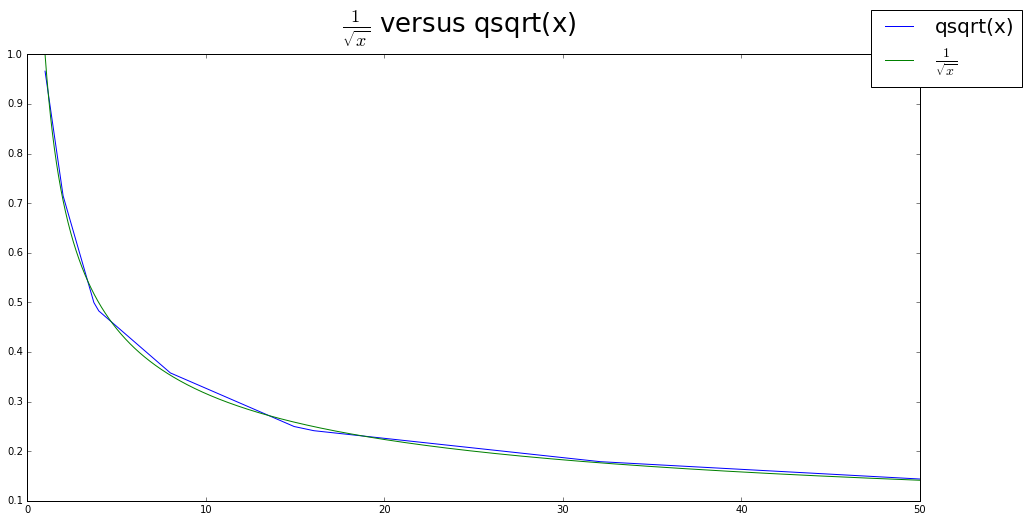

In [6]:
# Construct a plot
fig = plt.figure(figsize=(16,8));
ax = plt.axes();

# Plot the approximation and the actual inverse sqrt function
x = np.linspace(1, 50, 5000);
approximation, = ax.plot(x, rsqrt(x))
actual, = ax.plot(x, 1/np.sqrt(x))

fig.legend(handles=[approximation, actual], labels=[r'qsqrt(x)', r'$\frac{1}{\sqrt{x}}$'], fontsize=20);
fig.suptitle(r"$\frac{1}{\sqrt{x}}$ versus qsqrt(x)", fontsize=26);

hide_code_in_slideshow()

### Close Enough!

## So what's up with the `0x5f3759df`

Where did this thing come from?

* Is this some alien technology long lost to our generation?

* Is it super complicated and does it require advanced mathematical machinery?

* Is it just plain magic that only wizards understand?

*Should we open up Pandora's Box and peer inside? We are but mere mortals after all.*

![](http://i.imgur.com/ES18rQg.jpg?1)

## As it turns out, yes we can

In fact, I believe that the idea behind this technique is so easy that an $8^{th}$ grader can figure it all out.

*Seriously? When I was an $8^{th}$ grader, I could barely use a calculator...*

Hey, $8^{th}$ graders are pretty smart nowadays, plus, this isn't really as much of a mindfuck as you think it is.

## So easy, even a caveman can do it!

<p style="text-align: center;">
<img src="http://i.imgur.com/MxWzdDS.jpg" style="margin-left:auto; margin-right:auto;" />
</p>

## Notation

Recall that the fast inverse square root method looks like
```c
long i  = * ( long * ) &x;                  
i  = 0x5f3759df - ( i >> 1 );               
return * ( float * ) &i;```

Let's look at those two casts:
* `*(long*)&` takes a `float` and outputs a `long`
* `*(float*)&` takes a `long` and outputs a `float`

Let's name these two operations the float-to-long ($\textsf{f2l}: \textsf{float} \to \textsf{long}$) and the long-to-float ($\textsf{l2f}: \textsf{long} \to \textsf{float}$) operators.

$$
\textsf{rsqrt}(x) = \textsf{l2f}\left(\textsf{0x5f3759df} - \frac{1}{2} \textsf{f2l}\left(x\right)\right)
$$

<p><img src="http://i.imgur.com/KgLwu8O.png" style="margin-left:auto;margin-right:auto;"/></p>

<p id="conv123"><img src="http://i.imgur.com/cfDeVpO.png?1" style="margin-left:auto;margin-right:auto;"/></p>
<script>
var show_conv = function() {
    var p = $("#conv123");
    if (p.length==0) return;
    while (!p.is("section")) {
        p=p.parent();

        if (p.prop("tagName") =="body") return;
    }

    var section = p;
    section.attr('data-transition', 'fade-in slide-out');
}
show_conv();
</script>

## Do Snakes Dream of IEEE 754?

What would this look like in Python?

In [7]:
from struct import pack, unpack

to_long    = lambda hole: unpack('i', hole)[0] # y = (long*) x
to_float   = lambda hole: unpack('f', hole)[0] # y = (float*) x

from_long  = lambda hole: pack('i', int(hole) % 0x80000000) # long*  y = &x
from_float = lambda hole: pack('f', float(hole))            # float* y = &x

hide_code_in_slideshow()

[Double Click for Code]

In [8]:
@np.vectorize
def f2l(x):
    return to_long(from_float(x))

@np.vectorize
def l2f(y):
    return to_float(from_long(y))

Here, $$\begin{align*}
\textsf{f2l}(x) &= *(\textsf{long}*) \textsf{&} x \\
\textsf{l2f}(y) &= *(\textrm{float}*) \textsf{&} y
\end{align*}
$$

*Don't worry too much about the implementation details.*

## I can't believe it's not Casting!

What do we know about $\textsf{f2l}$ and $\textsf{l2f}$?

* Inverse Laws:

$$
\textsf{f2l}(\textsf{l2f}(x)) = x = \textsf{l2f}(\textsf{f2l}(x))
$$

<sub><small><em>e.g. If you convert a float to a long and then convert that long back to a float, you get the same float back.</em></small></sub>

* Anihilator Laws:

$$
\textsf{f2l}(0) = 0 = \textsf{l2f}(0)
$$
<sub><small><em>e.g. If you convert 0 from a float to a long, it's still 0.</em></small></sub>

There are a few other algebraic properties of `f2l` and `l2f`, but unfortunately, they're pretty unstructured. In particular, $x + y \ne \textsf{l2f}(\textsf{f2l}(x) + \textsf{f2l}(y))$:

In [9]:
int( l2f(f2l(1) + f2l(1)) ) # 1 + 1 is ...

170141183460469231731687303715884105728

## A Tale of two Variables

* Let's forget about the magic constant `0x5f3759df` for a moment.

* There are actually two magical constants in `rsqrt`, the other constant is the $-\frac{1}{2}$.
  * Hey, $\frac{1}{\sqrt{x}}$ is just $x^{-\frac{1}{2}}$, maybe they are related!

* Let's look at what happens when we change these two constants.

Since we don't really know what it's doing, let's just name it as if we don't know what we're doing:

$$
\textsf{foobar}_{M,C}(x) = \textsf{l2f}\left(M + C \cdot \textsf{f2l}(x)\right)
$$

## Foo, meet Bar
$$
\textsf{foobar}_{M,C}(x) = \textsf{l2f}\left(M + C \cdot \textsf{f2l}(x)\right)
$$

In [10]:
def foobar(M, C):
    return np.vectorize(lambda x: l2f(M + C * f2l(x)))

# rsqrt(x) is instantiated with M = 0x5f3759df and C = -1/2
rsqrt = foobar(0x5f3759df, -1.0/2.0)

Recall that the `log-log` plot for $y = M \cdot x^C$ is linear because

$$\begin{align*}
\log(y) &= \log\left(M x^C\right) \\
&= \log(M) + C \cdot \log(x)
\end{align*}$$

where $\log(y)$ varies linearly with $\log(x)$ with slope $C$.

What does `foobar` looks like under the `log-log` scale?

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:2276: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


[Double Click for Code]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


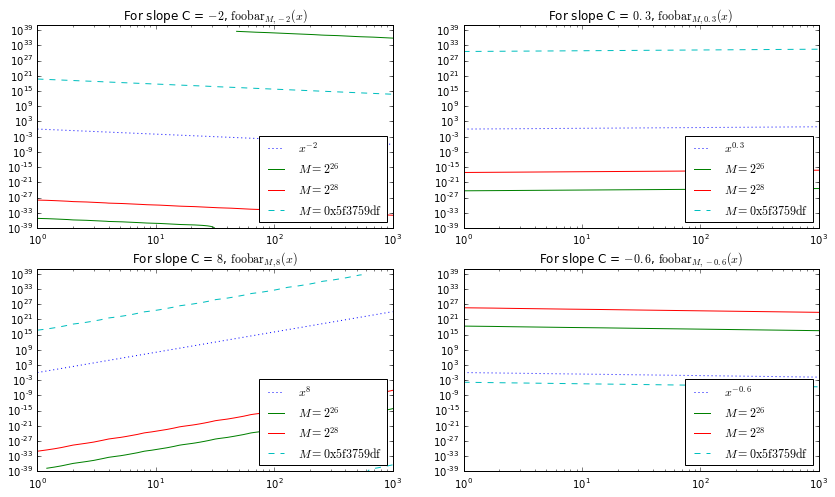

In [11]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['text.latex.unicode'] = False

x = np.linspace(1, 1000, 5000)
allM = (1 << 26, 1 << 28, 0x5f3759df)
properties = {
    (0, 0): {'M': allM, 'C': -2},
    (1, 0): {'M': allM, 'C': 8},
    (0, 1): {'M': allM, 'C': 0.3},
    (1, 1): {'M': allM, 'C': -0.6},
}
fig, axarr = plt.subplots(2, 2, figsize=(14,8));
for key, property in properties.items():
    C = property['C']
    axarr[key].set_ylim(1e-39, 1e41)
    handle, = axarr[key].loglog(x, x ** C, linestyle='dotted');
    handles = [handle]
    for M in property['M']:
        baz = foobar(M, C)
        kwargs = {'ls' : 'dashed'} if M == 0x5f3759df else {}
        handle, = axarr[key].loglog(x, np.abs(baz(x)), **kwargs)
        handles.append(handle)
    axarr[key].set_title(r'For slope C = $%s$, ${\rm foobar}_{M,%s}(x)$' % (C, C))
    axarr[key].legend(
        handles, 
        [
            r'$x^{%s}$' % C, 
            r'$M = 2^{26}$', 
            r'$M = 2^{28}$',
            r'$M = {\rm 0x5f3759df}$'
        ], loc=4)

hide_code_in_slideshow()

Notice how as $C$ gets closer to $-\frac{1}{2}$, the `0x5f3759df` line also gets closer to $x^C$.

### What do you see?

* All the slopes are parallel to each other.

* ...

Honestly, it's hard to grok anything off of a series of pictures, so let's invoke the ancient wisdom of Python and look at a video of this instead.

In [12]:
from IPython.display import HTML
from matplotlib import animation
animation.Animation._repr_html_ = lambda anim: anim.to_html5_video()

x = np.linspace(1, 1000, 5000)
allM = (1 << 26, 1 << 28, 0x5f3759df)
fig = plt.figure(figsize=(14,8))
ax = plt.axes(ylim=(1e-39, 1e41))

def plotSomeMagic(C, fig, ax, handles=None):
    if not handles:
        handle, = ax.loglog(x, x ** C, linestyle='dotted');
        handles = [handle]
        for M in allM:
            baz = foobar(M, C)
            kwargs = {'ls' : 'dashed'} if M == 0x5f3759df else {}
            handle, = ax.loglog(x, np.abs(baz(x)), **kwargs)
            handles.append(handle)
    else:
        handles[0].set_data(x, x ** C)
        baz = foobar(allM[0], C)
        handles[1].set_data(x, np.abs(baz(x)))
        baz = foobar(allM[1], C)
        handles[2].set_data(x, np.abs(baz(x)))
        baz = foobar(allM[2], C)
        handles[3].set_data(x, np.abs(baz(x)))
    ax.set_title(r'For slope C = $%s$, ${\rm foobar}_{M,%s}(x)$' % (C, C))
    ax.legend(
        handles, 
        [
            r'$x^{%s}$' % C, 
            r'$M = 2^{26}$', 
            r'$M = 2^{28}$',
            r'$M = {\rm 0x5f3759df}$'
        ], loc=4)
    return tuple(handles)

handles = plotSomeMagic(0, fig, ax)

# initialization function: plot the background of each frame
def init():
    return plotSomeMagic(1, fig, ax, handles)

# animation function.  This is called sequentially
def animate(i):
    return plotSomeMagic(i, fig, ax, handles)

hide_code_in_slideshow()

video = animation.FuncAnimation(fig, animate, init_func=init, frames=np.arange(-2,8,0.10), interval=100, blit=True)

plt.close();

video

[Double Click for Code]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:2276: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


## Graphing Calculator Woes

* This clearly suggests that all of the lines have the same slopes since they are all parallel.

* We only varied the $C$ with time, which changes the slopes of the lines.

* We can also definitely see the lines shift vertically over time as well, with the exception of $x^C$

* Also, the distances between the solid lines do not change even though their slopes do.

## Throwback to the $8^{th}$ Grade

* If you think back to Algebra 1, you should remember that the equation for a line is just

$$
w = a + b \cdot z
$$

* Here, we can substitute $w = \log(y)$, $z = \log(x)$, and $b = C$ to get it `log-log` equation:

$$
\log(y) = a + C \cdot \log(x)
$$

* In the case of $y = 1 \cdot x^C$, the corresponding `log-log` equation is

$$
\begin{align*}
\log(y) &= \log\left(1 \cdot x^C\right) \\
&= \log(1) + C \cdot \log(x).
\end{align*}
$$


* Since all of the other lines are parallel to the $x^C$ line, we also know, for some unknown constant $\alpha$, that
$$
\log\left(\textsf{foobar}_{M,C}(x)\right) = \alpha + C \cdot \log(x)\\
$$
This confirms our earlier suspicion that the slope $C$ is related to the exponent.

* In fact, since the distances between the lines do not change as we vary the slope $C$ in the video, it's clear that the unknown constant $\alpha$ will only depend on the value of our magical constant $M$:
$$
\alpha = \alpha_M
$$

# Eureka!

* It means that for every exponent $C$, there exists some constant $M$ such that $\textsf{foobar}_{M,C}(x) \approx x^C$.

* This is all we need to find meaningful "magic" constants!

### In fact, you can find a magic constant for every exponent $x^C$.

![](http://i.imgur.com/y3W6AEq.jpg)

## Fast Exponentiation [1]

We know that for each $C$, there's some magic $M^*$ such that
$$
\textsf{foobar}_{M^*,C}(x) = \textsf{l2f}\left(M^* + C \cdot \textsf{f2l}(x)\right) \approx x^C
$$

How do we find $M^*$? We know that for inverse square-roots, $M^*$ is around `0x5f3759df`.

  * Answer: More $8^{th}$ grade algebra.

## Fast Exponentiation [2]

Question: What happens if you send $x = 1$ into $x^C$?
  * Answer: $1^C = 1$ no matter what $C$ is. (Dude, Spoilers!)

This is the only crucial insight that we need.

## Fast Exponentiation [3]

So let's use $x = 1$ as a fixed boundary. If $\textsf{foobar}_{M^*,C}(x)$ is supposed to approximate $x^C$, then we should also expect that $\textsf{foobar}_{M^*,C}(x = 1) = 1^C$.

$$
\textsf{foobar}_{M^*,C}(1) = \textsf{l2f}\left(M^* + C \cdot \textsf{f2l}(1)\right) = 1^C = 1
$$

What do we do with that `l2f`? Recall that $\textsf{f2l}(\textsf{l2f}(a)) = a$, so let's apply `f2l` to both sides to cancel the `l2f` out.

$$
\textsf{f2l}\left(\textsf{l2f}\left(M^* + C \cdot \textsf{f2l}(1)\right)\right) = M^* + C \cdot \textsf{f2l}(1) = \textsf{f2l}(1)
$$

Unfortunately, $\textsf{f2l}(1) \ne 1$, but we can subtract the $C \cdot \textsf{f2l}(1)$ from both sides to get

$$
\begin{align*}
\left(M^* + C \cdot \textsf{f2l}(1)\right) - C \cdot \textsf{f2l}(1) &= \left(\textsf{f2l}(1)\right) - C \cdot \textsf{f2l}(1) \\
M^* &= \boxed{(1 - C) \cdot \textsf{f2l}(1)}
\end{align*}
$$

## Fast Exponentiations [Fin]

This seems to suggest that $\textsf{foobar}_{(1 - C)\textsf{f2l}(1),C}(x) \approx x^C$. How close is this to the truth?

In [12]:
# What is 1#?
display(Latex(r'Just $\textsf{f2l}(1) = \textsf{%s}$.' % hex(f2l(1))))

# What about inverse square-root?
display(Latex(r'For the inverse square-root, its magical constant should be \
  $$\left(1 - \frac{-1}{2}\right)\textsf{f2l}(1) = \textsf{%s}$$' 
              % hex(3 * f2l(1) // 2)))

hide_code_in_slideshow()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

[Double Click for Code]

Hmm, weren't we expecting `0x5f3759df` instead of `0x5f400000`?
  * It turns out that magic constants that are close to each other have nearly identicle behavior. Here, `0x5f3759df` is only 0.035% away from `0x5f400000`! Close enough.

## Behold! The Fast Arbitrary Power Method!

In [13]:
def qexp(C):
    # (1 - C) * f2l(1) + C * f2l(x)
    return np.vectorize(lambda x: l2f((1 - C) * f2l(1) + C * f2l(x)))

```c
#define MAGIC 0x3f800000
float qpow(float x, float exponent) {
  long i  = * ( long * ) &x;                  // floating point bit hack
  i  = (1 - exponent) * MAGIC + exponent * i; // what the fuck? 
  return * ( float * ) &i;
}```

[Double Click for Code]

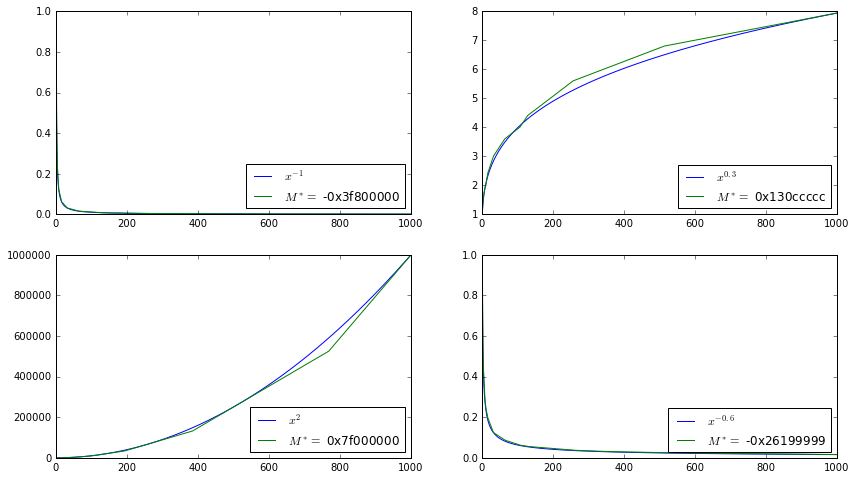

In [14]:
x = np.linspace(1, 1000, 5000)
properties = {
    (0, 0): {'M': allM, 'C': -1},
    (1, 0): {'M': allM, 'C': 2},
    (0, 1): {'M': allM, 'C': 0.3},
    (1, 1): {'M': allM, 'C': -0.6},
}
fig, axarr = plt.subplots(2, 2, figsize=(14,8));
for key, property in properties.items():
    C = property['C']
    handle, = axarr[key].plot(x, x ** C);
    handles = [handle]
    baz = qexp(C)
    handle, = axarr[key].plot(x, baz(x))
    handles.append(handle)
    # axarr[key].set_title(r'For slope C = $%s$, ${\rm foobar}_{M,%s}(x)$' % (C, C))
    axarr[key].legend(
        handles, 
        [
            r'$x^{%s}$' % C, 
            r'$M^* = $ %s' % hex(int(C * sharp(1))),
        ], loc=4)

hide_code_in_slideshow()

Hey, that actually looks pretty good! But what about the errors?

In [15]:
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(int(100 * y))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# ax.yaxis.set_major_formatter(formatter)
hide_code_in_slideshow()

[Double Click for Code]

[Double Click for Code]

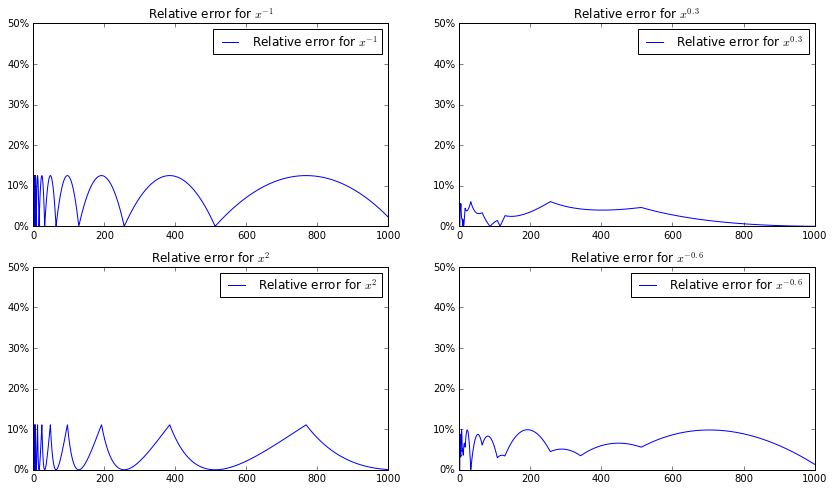

In [16]:
x = np.linspace(1, 1000, 5000)
properties = {
    (0, 0): {'C': -1},
    (1, 0): {'C': 2},
    (0, 1): {'C': 0.3},
    (1, 1): {'C': -0.6},
}
fig, axarr = plt.subplots(2, 2, figsize=(14,8));
for key, property in properties.items():
    axarr[key].set_ylim(0, 0.5)
    axarr[key].yaxis.set_major_formatter(formatter)
    C = property['C']
    baz = qexp(C)
    handle, = axarr[key].plot(x, np.abs(x ** C - baz(x))/(x ** C));
    axarr[key].set_title(r'Relative error for $x^{%s}$' % C)
    axarr[key].legend(
        [handle], 
        [r'Relative error for $x^{%s}$' % C])

hide_code_in_slideshow()

An error of around $10\%$? That's like nothing!

## Conclusion

* The idea behind Fast Inverse Sqrt isn't hard.

* In fact, you can write a "Fast Exponentiation" method for any arbitrary exponent!

* We're all wizards.

## Next Steps

* We didn't really talk about how people went from `0x5f400000` to `0x5f3759df`. There's a wealth of resources for this, but as a shameless plug, check out my [Fast Inverse Sqrt the Easy(ish) Way](http://www.phailed.me/2014/10/0x5f400000-understanding-fast-inverse-sqrt-the-easyish-way/).

* We can generate arbitrary fast power approximations, but it would be cool to generate something along the style of the original inverse-sqrt program.

In [18]:
%%html

<div id="meh">
<small style="font-size: 8px;">[Double Click for Code]</small>
<style>
.hide-in-slideshow-meh {
    display: None ! important;
}
</style>
</div>

<script type="text/javascript">
    var show_meh = function() {
        var p = $("#meh");
        var orig = p;
        if (p.length==0) return;

        while (!p.hasClass("cell")) {
            p=p.parent();

            if (p.prop("tagName") =="body") return;
        }
        var cell = p;
        cell.dblclick(function() {
          if (!orig.hasClass("hide-in-slideshow-meh")) {
            cell.find(".input").removeClass("hide-in-slideshow-meh");
            orig.addClass("hide-in-slideshow-meh");
          } else {
            cell.find(".input").addClass("hide-in-slideshow-meh");
            orig.removeClass("hide-in-slideshow-meh");
          }
        });
        cell.find(".input").addClass("hide-in-slideshow-meh");
    }
    show_meh();
</script>

<pre id="wee" class="language-c cm-s-ipython highlight">
// For x^(-0.5)
float qpow(float x) {
  long i  = * ( long * ) &x;                  
  i  = 0x5f400000 + -0.5 * i;               
  return * ( float * ) &i;
}
</pre>

<p>
<input type="text" id="pown" val="-0.5"/>
</p>
<script type="text/javascript">
    require.config({
        paths: {
            "highlight": "https://cdnjs.cloudflare.com/ajax/libs/highlight.js/9.4.0/highlight.min",
        }
    });
    require(["highlight"], function(hljs) {
        hljs.configure({
          classPrefix: 'cm-'     // don't append class prefix
        });
            
        $('#wee').each(function(i, block) {
          hljs.highlightBlock(block);
        });

        $("#pown").keyup(function() {
            var C = Number($("#pown").val());
            if (Number.isNaN(C)) return;
            var M = Math.floor(1065353216 * (1 - C)) % 4294967296;
            var sign = M >= 0 ? '' : '-';
            var code = "// For x^(" + C + ")\nfloat qpow(float x) {\n  long i  = * ( long * ) &x;\n  i  = " + sign + "0x" + Math.abs(M).toString(16) + " + " + C + " * i;\n  return * ( float * ) &i;\n}\n";
            $("#wee").html(code);
            $('#wee').each(function(i, block) {
              hljs.highlightBlock(block);
            });
        });
    });
    
</script>

* Check back at http://www.bullshitmath.lol/ for more posts in the future!

# Thanks!

## Appendix: What's the point?

* Fast Inverse Roots and its mythical constant has creeped into the mainstream programming community since its rediscovery back in 2009. However, most of the sources (including its own Wikipedia article) shed relatively little light behind the intuition behind the technique.

* What better way to understand something than to completely re-invent it from scratch. We're lucky, the method (much like Lambda Calculus) is a lot simpler and more intuitive than the hoards of papers and mysterious hexadecimal constants related to the method will have you believe.

* In particular, you don't need any sophisticated mathematics. You don't need group theory, you don't need calculus, you don't even need to consult the floating point manual. All you need is a bit of $8^{th}$ grade algebra and some experience with using Logarithms.